In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
def moving_average(dataset,width):
    # function that takes a dataset with size 2xN
    # and returns the average of each set of
    # consecutive points with a given width
    x,y=dataset[0],dataset[1]
    avx,avy=[],[]
    pointers=[[] for i in range(max(x)+1)] # list with which y have points with a given x
    for i in range(len(x)):
        pointers[x[i]].append(y[i])
    for i in range(min(x),max(x)-width+2):
        avx.append(i+(width-1)/2) # average x position
        n=0
        for j in range(i,i+width):# counting of points in the width
            n+=len(pointers[j])
        avy.append(n)
    return avx,avy

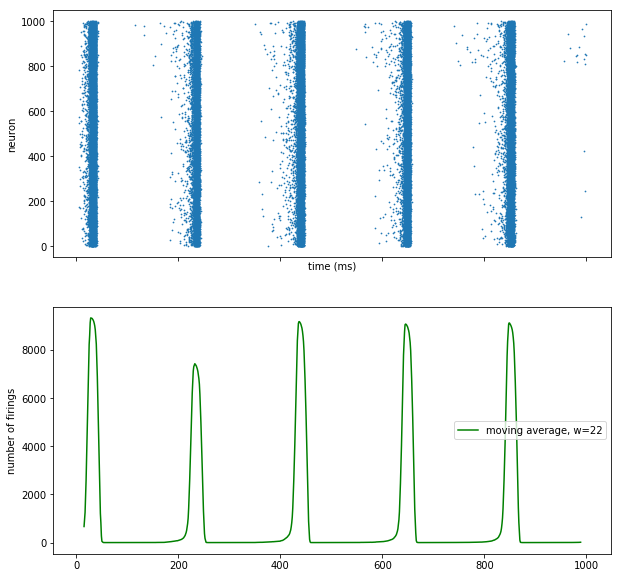

In [53]:
for i in range(50,51): # loop over noises, i=10*NOISE_MAX
    dirstring="MATLAB Codes/Izhikevich Matlab code/firings"+str(i)+".csv"
    firings=pd.read_csv(dirstring,header=None)
    fig, ax = plt.subplots(2,1,sharex=True,figsize=[10,10])
    ax[0].scatter(firings[0],firings[1],label="firings",s=0.5) # plot of firings
    ax[0].set_xlabel("time (ms)")
    ax[0].set_ylabel("neuron")
    fireneurons=[]
    for j in range(len(firings)): # counting of how many neurons did fire
        if (firings[1][j] not in fireneurons):
            fireneurons.append(firings[1][j])
    timescale=round(1000*len(fireneurons)/len(firings)) # (revisar quina és la millor forma d'escollir-lo)
    avx,avy=moving_average(firings,timescale) # plot of the moving average
    ax[1].plot(avx,avy,"g-",label="moving average, w="+str(timescale))
    ax[1].set_ylabel("number of firings")
    ax[1].legend()

In [ ]:
# for Ivan and Max:
# we can do this for different values of the noise, and see where there are peaks and where there are not.
# then we can make a plot with a measure of how "peaky" is the plot of a noise (the length of the curve, for instance),
# as a function of the noise